In [ ]:
from googlesearch import search
import bs4 as bs
import urllib.request

In [ ]:
source = urllib.request.urlopen('https://www.weforum.org/agenda/2021/01/building-resilience-in-the-face-of-dynamic-disruption/').read()
soup = bs.BeautifulSoup(source,'lxml')


# title of the page
print(soup.title)

# get attributes:
print(soup.title.name)

# get values:
print(soup.title.string)

# beginning navigation:
print(soup.title.parent.name)

# getting specific values:
print(soup.p)

<title>These are the top risks for business in the post-COVID world | World Economic Forum</title>
title
These are the top risks for business in the post-COVID world | World Economic Forum
head
<p class="chakra-text wef-1f2ha05"></p>


In [ ]:
nav = soup.nav

In [ ]:
paragraphs = []
body = soup.body
for paragraph in body.find_all('p'):
    paragraphs.append(paragraph.text)

print(paragraphs)

['', 'Over the past year, the business landscape has become much more precarious due to protracted uncertainty and confusion in pandemic response approaches, the challenges of vaccine rollouts and emerging virus variants - and spillover effects into other risks.', 'Businesses have had to manage dual economic and health crises, which have driven new employee and customer engagement protocols, remote working on an unprecedented scale, the re-engineering of supply chains, and numerous bankruptcies, consolidations and creative partnerships.', 'These developments and the long-term risk outlook have businesses wondering how to prepare for what may lie ahead. Foremost on their mind is their survival and building resilience. And not only in relation to ongoing pandemic impacts and their competitive positioning, but also recently unleashed cyber-attacks, catastrophic climate events and social unrest that demands workplace and community change. ', 'While many businesses have innovated and adapte

In [ ]:
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

In [ ]:
paragraphs_text = "\n ".join(paragraphs)
doc = nlp(paragraphs_text)

In [ ]:
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])

Noun phrases: ['the past year', 'the business landscape', 'protracted uncertainty', 'confusion', 'pandemic response approaches', 'vaccine rollouts', 'emerging virus variants', 'spillover effects', 'other risks', 'Businesses', 'dual economic and health crises', 'which', 'new employee and customer engagement protocols', 'an unprecedented scale', 'the re', '-', 'engineering', 'supply chains', 'numerous bankruptcies', 'consolidations', 'creative partnerships', 'These developments', 'the long-term risk outlook', 'businesses', 'what', 'their mind', 'their survival', 'building resilience', 'relation', 'ongoing pandemic impacts', 'their competitive positioning', 'cyber-attacks', 'catastrophic climate events', 'social unrest', 'that', 'workplace', 'community change', 'many businesses', 'rapidly-changing circumstances - seizing market share', 'the process', 'not all', 'the expected economic recovery', 'Businesses', 'a disorderly shakeout', 'this volatile recovery period', 'they', 'their risk mit

In [ ]:
noun_phrases = []
for sentence in paragraphs:
    doc_2 = nlp(sentence)
    noun_phrases.append([chunk.text for chunk in doc_2.noun_chunks])

print(noun_phrases)

[[], ['the past year', 'the business landscape', 'protracted uncertainty', 'confusion', 'pandemic response approaches', 'the challenges', 'vaccine rollouts', 'emerging virus variants', 'spillover effects', 'other risks'], ['Businesses', 'dual economic and health crises', 'which', 'new employee and customer engagement protocols', 'an unprecedented scale', 'the re', '-', 'engineering', 'supply chains', 'numerous bankruptcies', 'consolidations', 'creative partnerships'], ['These developments', 'the long-term risk outlook', 'businesses', 'what', 'their mind', 'their survival', 'building resilience', 'relation', 'ongoing pandemic impacts', 'their competitive positioning', 'cyber-attacks', 'catastrophic climate events', 'social unrest', 'that', 'workplace', 'community change'], ['many businesses', 'rapidly-changing circumstances - seizing market share', 'the process', 'not all', 'the expected economic recovery', 'Businesses', 'a disorderly shakeout', 'this volatile recovery period', 'they', 

In [ ]:
def get_couples(sub_list):
    couples = []
    #for nouns in sub_list:
    couples.append(sorted(list(itertools.permutations(sub_list,2))))
    return couples

In [ ]:
import itertools
from collections import Counter
import networkx as nx

In [ ]:
pairs = []
for item in noun_phrases:
    if len(item)>1:
        pairs.append(get_couples(item))

print(pairs)


[[[('confusion', 'emerging virus variants'), ('confusion', 'other risks'), ('confusion', 'pandemic response approaches'), ('confusion', 'protracted uncertainty'), ('confusion', 'spillover effects'), ('confusion', 'the business landscape'), ('confusion', 'the challenges'), ('confusion', 'the past year'), ('confusion', 'vaccine rollouts'), ('emerging virus variants', 'confusion'), ('emerging virus variants', 'other risks'), ('emerging virus variants', 'pandemic response approaches'), ('emerging virus variants', 'protracted uncertainty'), ('emerging virus variants', 'spillover effects'), ('emerging virus variants', 'the business landscape'), ('emerging virus variants', 'the challenges'), ('emerging virus variants', 'the past year'), ('emerging virus variants', 'vaccine rollouts'), ('other risks', 'confusion'), ('other risks', 'emerging virus variants'), ('other risks', 'pandemic response approaches'), ('other risks', 'protracted uncertainty'), ('other risks', 'spillover effects'), ('other

In [ ]:
print(pairs[0])

[[('confusion', 'emerging virus variants'), ('confusion', 'other risks'), ('confusion', 'pandemic response approaches'), ('confusion', 'protracted uncertainty'), ('confusion', 'spillover effects'), ('confusion', 'the business landscape'), ('confusion', 'the challenges'), ('confusion', 'the past year'), ('confusion', 'vaccine rollouts'), ('emerging virus variants', 'confusion'), ('emerging virus variants', 'other risks'), ('emerging virus variants', 'pandemic response approaches'), ('emerging virus variants', 'protracted uncertainty'), ('emerging virus variants', 'spillover effects'), ('emerging virus variants', 'the business landscape'), ('emerging virus variants', 'the challenges'), ('emerging virus variants', 'the past year'), ('emerging virus variants', 'vaccine rollouts'), ('other risks', 'confusion'), ('other risks', 'emerging virus variants'), ('other risks', 'pandemic response approaches'), ('other risks', 'protracted uncertainty'), ('other risks', 'spillover effects'), ('other 

In [ ]:

nodes= []
for item in pairs:
    for sub_item in item[0]:
        list_sub_item = list(sub_item)
        nodes.append(list_sub_item)

print(nodes)

[['confusion', 'emerging virus variants'], ['confusion', 'other risks'], ['confusion', 'pandemic response approaches'], ['confusion', 'protracted uncertainty'], ['confusion', 'spillover effects'], ['confusion', 'the business landscape'], ['confusion', 'the challenges'], ['confusion', 'the past year'], ['confusion', 'vaccine rollouts'], ['emerging virus variants', 'confusion'], ['emerging virus variants', 'other risks'], ['emerging virus variants', 'pandemic response approaches'], ['emerging virus variants', 'protracted uncertainty'], ['emerging virus variants', 'spillover effects'], ['emerging virus variants', 'the business landscape'], ['emerging virus variants', 'the challenges'], ['emerging virus variants', 'the past year'], ['emerging virus variants', 'vaccine rollouts'], ['other risks', 'confusion'], ['other risks', 'emerging virus variants'], ['other risks', 'pandemic response approaches'], ['other risks', 'protracted uncertainty'], ['other risks', 'spillover effects'], ['other r

In [ ]:
result = [[*t, count] for t, count in Counter(map(tuple, nodes)).items()]

In [ ]:
print(result)

[['confusion', 'emerging virus variants', 1], ['confusion', 'other risks', 1], ['confusion', 'pandemic response approaches', 1], ['confusion', 'protracted uncertainty', 1], ['confusion', 'spillover effects', 1], ['confusion', 'the business landscape', 1], ['confusion', 'the challenges', 1], ['confusion', 'the past year', 1], ['confusion', 'vaccine rollouts', 1], ['emerging virus variants', 'confusion', 1], ['emerging virus variants', 'other risks', 1], ['emerging virus variants', 'pandemic response approaches', 1], ['emerging virus variants', 'protracted uncertainty', 1], ['emerging virus variants', 'spillover effects', 1], ['emerging virus variants', 'the business landscape', 1], ['emerging virus variants', 'the challenges', 1], ['emerging virus variants', 'the past year', 1], ['emerging virus variants', 'vaccine rollouts', 1], ['other risks', 'confusion', 1], ['other risks', 'emerging virus variants', 1], ['other risks', 'pandemic response approaches', 1], ['other risks', 'protracted

In [ ]:
import pandas as pd

In [ ]:
df_final_list_nodes_counted = pd.DataFrame (result, columns = ['Node 1', 'Node 2', 'Count'])
df_final_list_nodes_counted.head()

,Node 1,Node 2,Count
0,confusion,emerging virus variants,1
1,confusion,other risks,1
2,confusion,pandemic response approaches,1
3,confusion,protracted uncertainty,1
4,confusion,spillover effects,1


In [ ]:
df_final_list_nodes_counted.to_csv('accident.csv', header=True, index=False)

In [ ]:
G = nx.from_pandas_edgelist(df_final_list_nodes_counted, 'Node 1', 'Node 2')

In [ ]:
import matplotlib.pyplot as plt

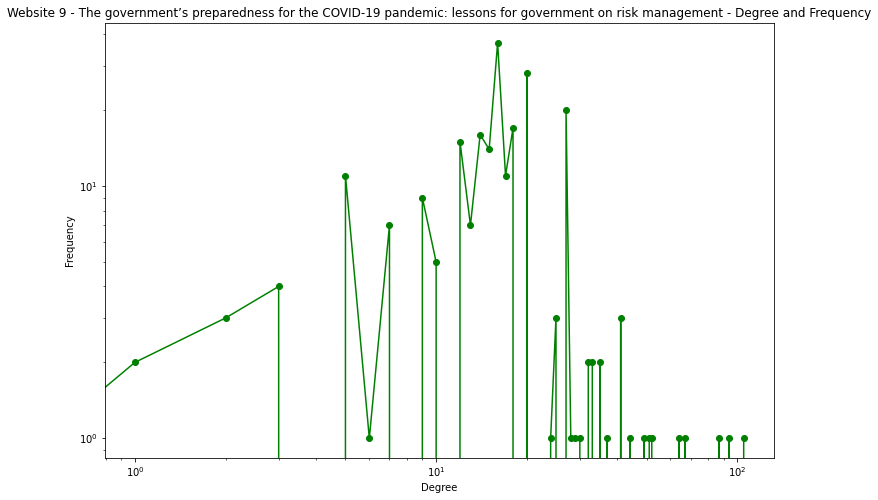

In [ ]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.loglog(degrees, degree_freq,'go-')
plt.title('Website 9 - The government’s preparedness for the COVID-19 pandemic: lessons for government on risk management - Degree and Frequency')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()